Przygotowanie danych:

In [20]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

Klasteryzacja KMeans dla 8, 9, 10, 11, 12 klastrów:

In [21]:
from sklearn.cluster import KMeans

models = {}

for i in range(8, 13):
    if i == 10:
        models[f"model_{i}"] = KMeans(n_clusters=i, n_init=10, random_state=0)
    else:
        models[f"model_{i}"] = KMeans(n_clusters=i, n_init=10)
    models[f"model_{i}"].fit(X)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Wskaźniki sylwetkowe:

In [22]:
silhouette_list = []

from sklearn.metrics import silhouette_score

for i in range(8, 13):
    silhouette_list.append(silhouette_score(X, models[f"model_{i}"].labels_))

print(silhouette_list)

import pickle as pkl

with open("kmeans_sil.pkl", "wb") as file:
    pkl.dump(silhouette_list, file)

KeyboardInterrupt: 

In [23]:
best_k = 8 + np.argmax(silhouette_list)
print(f"Najlepszy wskaźnik sylwetkowy jest dla k = {best_k}")

Najlepszy wskaźnik sylwetkowy jest dla k = 8


Macierz błędów:

In [24]:
y_predicted = models[f"model_10"].predict(X)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_predicted)

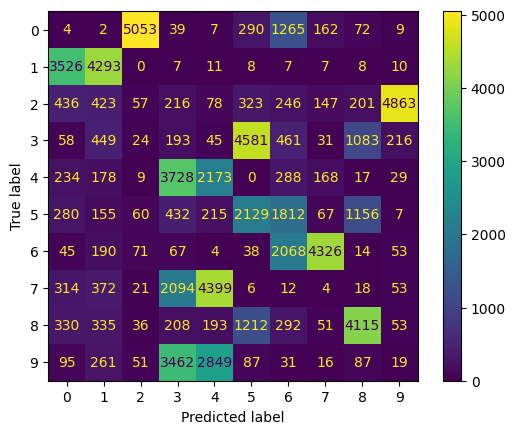

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
disp.plot()

plt.show()

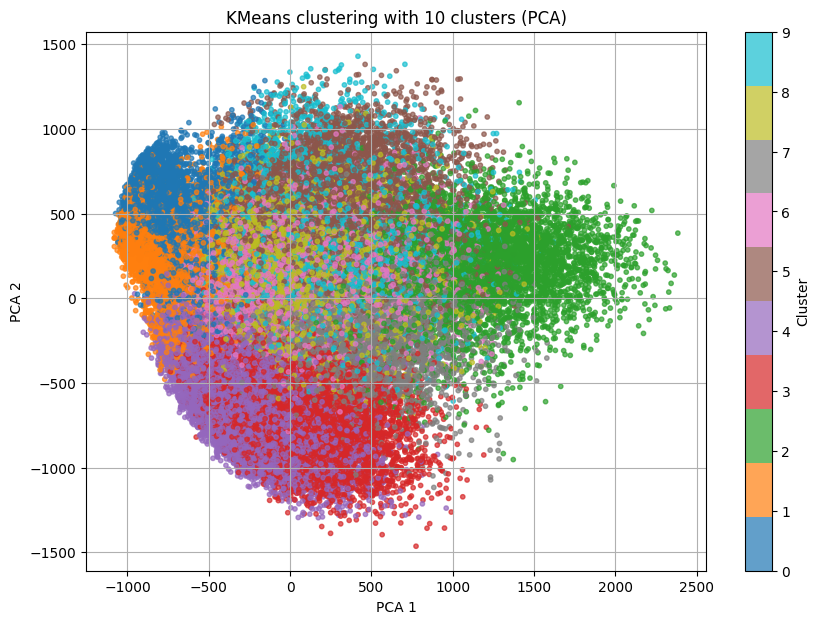

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = models["model_10"]
labels = model.labels_

X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.title("KMeans clustering with 10 clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Maxes w confusion matrix:

In [27]:
argmaxes = np.argmax(conf_matrix, axis=1)
unique_sorted = sorted(set(argmaxes))

import pickle as pkl

with open("kmeans_argmax.pkl", "wb") as file:
    pkl.dump(unique_sorted, file)


In [28]:
print(unique_sorted)

[1, 2, 3, 4, 5, 7, 8, 9]


DBSCAN:

In [29]:
first_300 = X[:300]

from scipy.spatial.distance import cdist

distances = cdist(first_300, X, metric='euclidean')
distances = distances.flatten()
distances = distances[distances != 0]
smallest_10 = np.sort(distances)[:10].tolist()

import pickle as pkl 

with open("dist.pkl", "wb") as file:
    pkl.dump(smallest_10, file)

KeyboardInterrupt: 

In [ ]:
print(smallest_10)

s = np.average(smallest_10[:3])

eps_stop = s + 0.1 * s
step = 0.04 * s

eps_list = []
eps = s

while eps <= eps_stop:
    eps_list.append(eps)
    eps += step

print(eps_list)

[279.26152617215286, 304.37641170103836, 317.5893575043093, 328.7658741414626, 333.4546445920344, 352.89800226127664, 355.1774204534967, 358.07401469528617, 359.64287842247063, 360.42474942767177]
[300.40909845916684, 312.4254623975335, 324.4418263359002]


In [ ]:
from sklearn.cluster import DBSCAN

dbscan_models = {}
labels_list = []

for eps in eps_list:
    dbscan_models[f"model_{eps}"] = DBSCAN(eps=eps, min_samples=5)
    dbscan_models[f"model_{eps}"].fit(X)
    labels = dbscan_models[f"model_{eps}"].labels_
    print(f"eps={eps:.3f}, clusters={len(set(labels) - {-1})}, outliers={(labels == -1).sum()}")
    labels_list.append(len(set(labels)))

print(labels_list)

eps=300.409, clusters=3, outliers=69983
eps=312.425, clusters=6, outliers=69964
eps=324.442, clusters=21, outliers=69855
[4, 7, 22]


In [ ]:
print(labels_list)

with open("dbscan_len.pkl", "wb") as file:
    pkl.dump(labels_list, file)

[3, 6, 21]


In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import DBSCAN
# import pickle

# X_reduced = PCA(n_components=30).fit_transform(X)

# labels_list = []

# for eps in eps_list:
#     model = DBSCAN(eps=eps, min_samples=5)
#     model.fit(X_reduced)
#     n_clusters = len(set(model.labels_) - {-1})
#     labels_list.append(n_clusters)
#     print(f"eps={eps:.4f} => clusters: {n_clusters}, noise: {(model.labels_ == -1).sum()}")
    
# with open("dbscan_len.pkl", "wb") as f:
#     pickle.dump(labels_list, f)


: 